1. Estimar integral definida

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pela esquerda
def soma_Riemann_Esquerda (f, a, b, n): #f é a funcao a ser integrada, a é o limite inferior, b é o limite superior, n é o número de retangulos para aproximar a area da curvaa
    dx = (b - a) / n #largura de cada retangulo
    x = np.linspace(a, b - dx, n) #gera n pontos igualmente espaçados de a ate b - dx
    return np.sum(f(x) * dx)

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pela direita
def soma_Riemann_Direita(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a + dx, b, n)
    return np.sum(f(x) * dx)

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pele metodo do ponto medio
def soma_Riemann_PM(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a + dx/2, b - dx/2, n)
    return np.sum(f(x) * dx)

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pelo metodo dos trapezoides
def soma_Riemann_Trapezoides(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (dx / 2) * np.sum(y[:-1] + y[1:])    

def f(x): #define a funcao a ser integrada
    return np.exp(-x**2)

#valor conhecido da integral
valor_real = 0.746824

#intervalo da integração
a, b = 0, 1

#valores de n 
n_valores = [100, 1000, 10000]
erros_esq, erros_dir, erros_pm, erros_trap = [], [], [], []

#erro absoluto
for n in n_valores:
    erros_esq.append(abs(soma_Riemann_Esquerda(f, a, b, n) - valor_real))
    erros_dir.append(abs(soma_Riemann_Direita(f, a, b, n) - valor_real))
    erros_pm.append(abs(soma_Riemann_PM(f, a, b, n) - valor_real))
    erros_trap.append(abs(soma_Riemann_Trapezoides(f, a, b, n) - valor_real))

#print da estimativa das integrais e do erro absoluto para cada n
print("resultados e erros absolutos para cada metodo:\n")
print("{:<10} {:<25} {:<20} {:<20}".format("n", "Metodo", "Resultado", "Erro Absoluto"))

for n in n_valores:
    resultado_esq = soma_Riemann_Esquerda(f, a, b, n)
    resultado_dir = soma_Riemann_Direita(f, a, b, n)
    resultado_pm = soma_Riemann_PM(f, a, b, n)
    resultado_trap = soma_Riemann_Trapezoides(f, a, b, n)

    erro_esq = abs(resultado_esq - valor_real)
    erro_dir = abs(resultado_dir - valor_real)
    erro_pm = abs(resultado_pm - valor_real)
    erro_trap = abs(resultado_trap - valor_real)

    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Riemann Esquerda", resultado_esq, erro_esq))
    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Riemann Direita", resultado_dir, erro_dir))
    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Ponto Medio", resultado_pm, erro_pm))
    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Trapezio", resultado_trap, erro_trap))




resultados e erros absolutos para cada metodo:

n          Metodo                    Resultado            Erro Absoluto       
100        Riemann Esquerda          0.7499786043         0.0031546043        
100        Riemann Direita           0.7436573987         0.0031666013        
100        Ponto Medio               0.7468271985         0.0000031985        
100        Trapezio                  0.7468180015         0.0000059985        
1000       Riemann Esquerda          0.7471401318         0.0003161318        
1000       Riemann Direita           0.7465080112         0.0003159888        
1000       Ponto Medio               0.7468241635         0.0000001635        
1000       Trapezio                  0.7468240715         0.0000000715        
10000      Riemann Esquerda          0.7468557382         0.0000317382        
10000      Riemann Direita           0.7467925262         0.0000314738        
10000      Ponto Medio               0.7468241331         0.0000001331        
1000

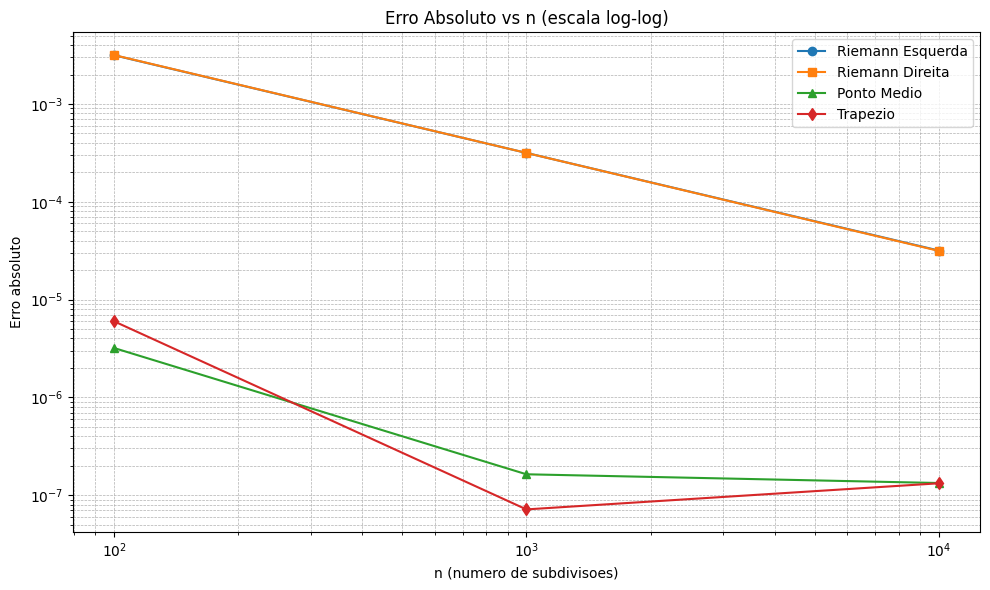

In [4]:
#plotando grafico log-log

plt.figure(figsize=(10, 6))
plt.loglog(n_valores, erros_esq, label='Riemann Esquerda', marker='o')
plt.loglog(n_valores, erros_dir, label='Riemann Direita', marker='s')
plt.loglog(n_valores, erros_pm, label='Ponto Medio', marker='^')
plt.loglog(n_valores, erros_trap, label='Trapezio', marker='d')

plt.title("Erro Absoluto vs n (escala log-log)")
plt.xlabel("n (numero de subdivisoes)")
plt.ylabel("Erro absoluto")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

2. Três formas analíticas de calcular uma mesma soma

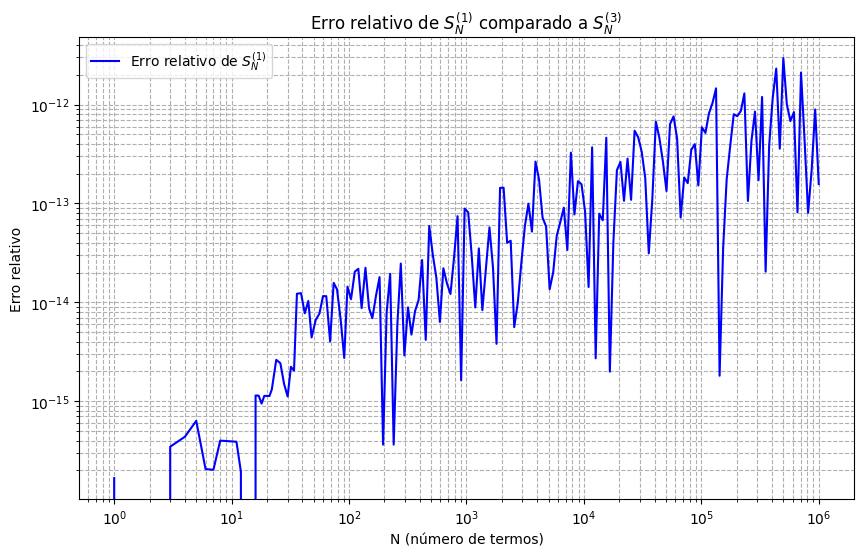

Inclinação (slope): 0.584
Coeficiente de correlação R²: 0.501


In [9]:
import numpy as np
import matplotlib.pyplot as plt

#def das tres formas de soma apresentadas no problema

def S1(N):
    n = np.arange(1, 2*N + 1)
    return np.sum((-1)**n * n / (n + 1))

def S2(N):
    n = np.arange(1, N + 1)
    return -np.sum((2*n - 1) / (2*n)) + np.sum(2*n / (2*n + 1))

def S3(N):
    n = np.arange(1, N + 1)
    return np.sum(1 / (2*n * (2*n + 1)))

#erro relativo (usando S3 como referencia "exata")
def erro_relativo(S_aproximado, S_exato):
    return np.abs((S_aproximado - S_exato) / S_exato)

#lista de ns 
Ns = np.logspace(0, 6, num=200, dtype=int)  # de 10^0 a 10^6

#errros
erros_relativos_S1 = []

for N in Ns:
    s1 = S1(N)
    s3 = S3(N)
    erro = erro_relativo(s1, s3)
    erros_relativos_S1.append(erro)

#converte para numpy array
erros_relativos_S1 = np.array(erros_relativos_S1)

# Plotagem
plt.figure(figsize=(10,6))
plt.loglog(Ns, erros_relativos_S1, label='Erro relativo de $S_N^{(1)}$', color='blue')
plt.xlabel('N (número de termos)')
plt.ylabel('Erro relativo')
plt.title('Erro relativo de $S_N^{(1)}$ comparado a $S_N^{(3)}$')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()

#reta
from scipy.stats import linregress

## faixa linear
indices = (Ns > 1e2) & (Ns < 1e5)

log_Ns = np.log10(Ns[indices])
log_erros = np.log10(erros_relativos_S1[indices])

# Regressao linear log-log
slope, intercept, r_value, p_value, std_err = linregress(log_Ns, log_erros)

print(f"Inclinação (slope): {slope:.3f}")
print(f"Coeficiente de correlação R²: {r_value**2:.3f}")


3. Tempo de execucação de um código

=== Parte (a): Medição de tempo ===
Iterativa (N=10000000): 0.502029 segundos
Analítica (N=10000000): 0.000002 segundos

Iterativa (N=100000000): 4.946553 segundos
Analítica (N=100000000): 0.000002 segundos


=== Parte (b): Abordagens com listas ===
Lista com for (N=10000000): 0.664918 segundos
Lista com sum() (N=10000000): 0.363369 segundos

=== Parte (c): Geração de gráfico ===

Medindo N=1000
Iterativa: 0.000050 segundos
Analítica: 0.000001 segundos
Lista com for: 0.000059 segundos
Lista com sum: 0.000022 segundos
NumPy: 0.000042 segundos

Medindo N=10000
Iterativa: 0.000400 segundos
Analítica: 0.000001 segundos
Lista com for: 0.000483 segundos
Lista com sum: 0.000227 segundos
NumPy: 0.000023 segundos

Medindo N=100000
Iterativa: 0.004238 segundos
Analítica: 0.000001 segundos
Lista com for: 0.005069 segundos
Lista com sum: 0.002254 segundos
NumPy: 0.000485 segundos

Medindo N=1000000
Iterativa: 0.052307 segundos
Analítica: 0.000001 segundos
NumPy: 0.003823 segundos

Medindo N=100000

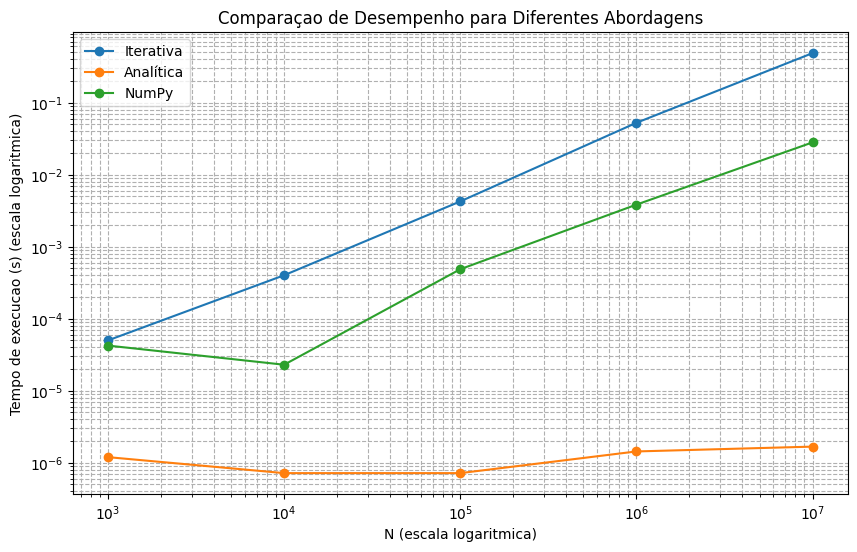


=== Parte (d): Versão vetorizada com NumPy ===
NumPy (N=10000000): 0.029613 segundos
NumPy (N=100000000): 0.348350 segundos


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

#calculos das somas
def soma_iterativa(N):
    s = 0
    for i in range(1, N + 1):
        s += i
    return s

def soma_analitica(N):
    return N * (N + 1) // 2

#implementando listas
def soma_lista_for(N):
    lista = list(range(1, N + 1))
    s = 0
    for x in lista:
        s += x
    return s

def soma_lista_sum(N):
    lista = list(range(1, N + 1))
    return sum(lista)

# d)vetorizacao com numpy
def soma_numpy(N):
    arr = np.arange(1, N + 1)
    return np.sum(arr)

#medir o tempo
def medir_tempo(funcao, N):
    start = time.time()
    resultado = funcao(N)
    end = time.time()
    return end - start, resultado

# Valores de N para teste
Ns = [10**7, 10**8]  # medicoes principais
Ns_grafico = [10**3, 10**4, 10**5, 10**6, 10**7]  # medicoes para o gerar os graficos

# medicao de tempo
print("=== Parte (a): Medição de tempo ===")
for n in Ns:
    # versao iterativa
    tempo, resultado = medir_tempo(soma_iterativa, n)
    print(f"Iterativa (N={n}): {tempo:.6f} segundos")
    
    #versao analitica
    tempo, resultado = medir_tempo(soma_analitica, n)
    print(f"Analítica (N={n}): {tempo:.6f} segundos\n")

#meicao de tempo para listas
print("\n=== Parte (b): Abordagens com listas ===")
for n in Ns[:1]:  # Apenas N=10^7 por causa da memoria
    # abordagem com for
    tempo, resultado = medir_tempo(soma_lista_for, n)
    print(f"Lista com for (N={n}): {tempo:.6f} segundos")
    
    # abordagem com sum
    tempo, resultado = medir_tempo(soma_lista_sum, n)
    print(f"Lista com sum() (N={n}): {tempo:.6f} segundos")

#grafico comparativo
print("\n=== Parte (c): Geração de gráfico ===")
funcoes = {
    "Iterativa": soma_iterativa,
    "Analítica": soma_analitica,
    "Lista com for": soma_lista_for,
    "Lista com sum": soma_lista_sum,
    "NumPy": soma_numpy
}

tempos = {nome: [] for nome in funcoes}

for n in Ns_grafico:
    print(f"\nMedindo N={n}")
    for nome, funcao in funcoes.items():
        # pula o que eh inviavel
        if n >= 10**6 and nome.startswith("Lista"):
            tempos[nome].append(None)
            continue
            
        tempo, _ = medir_tempo(funcao, n)
        tempos[nome].append(tempo)
        print(f"{nome}: {tempo:.6f} segundos")

# plota o grafico
plt.figure(figsize=(10, 6))
for nome, valores in tempos.items():
    if any(v is None for v in valores):
        continue
    plt.loglog(Ns_grafico, valores, 'o-', label=nome)

plt.xlabel('N (escala logaritmica)')
plt.ylabel('Tempo de execucao (s) (escala logaritmica)')
plt.title('Comparaçao de Desempenho para Diferentes Abordagens')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

# d) comparando numpy para grandes valores
print("\n=== Parte (d): Versão vetorizada com NumPy ===")
for n in Ns:
    tempo, resultado = medir_tempo(soma_numpy, n)
    print(f"NumPy (N={n}): {tempo:.6f} segundos")